In [16]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [17]:
# 1. 데이터 불러오기
(train_data,train_label),(test_data,test_label)= keras.datasets.fashion_mnist.load_data()

In [18]:
print(type(train_data))
print(train_data.shape)


<class 'numpy.ndarray'>
(60000, 28, 28)


In [19]:
# 표준화,정규화
train_s=train_data/255.0
test_s=test_data/255.0


In [20]:
# train, test 분리
train_ss,test_ss,train_label,test_label=train_test_split(train_s,train_label)

In [21]:
# 딥러닝 선언
model= keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation='softmax'))
          

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [23]:
# 콜백선언
chpoint= keras.callbacks.ModelCheckpoint('')

In [24]:
# 조기종료
early_stop = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

469/469 [==============================] - 2s 4ms/step - loss: 0.3248 - accuracy: 0.8817


In [ ]:
score=model.evaluate(test_ss,test_label)

In [34]:
print(histoty.history.keys())
print(histoty.history['loss'])
print(histoty.history['accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.5751463770866394, 0.42189666628837585, 0.3805549442768097, 0.35706982016563416, 0.33977028727531433, 0.3278021216392517, 0.31584930419921875, 0.3051653802394867, 0.2984258830547333]
[0.8008888959884644, 0.8491333723068237, 0.8625555634498596, 0.8704888820648193, 0.8758888840675354, 0.8797333240509033, 0.8843111395835876, 0.8877333402633667, 0.8894667029380798]


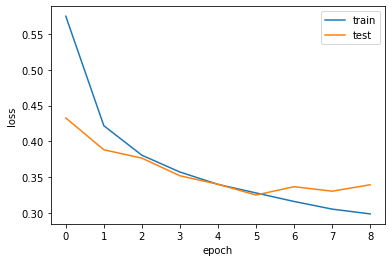

In [36]:
plt.plot(histoty.history['loss'])
plt.plot(histoty.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [26]:
histoty=model.fit(train_ss,train_label,epochs=20,validation_data=(test_ss,test_label),callbacks=[chpoint,early_stop])

Epoch 1/20
  18/1407 [..............................] - ETA: 9s - loss: 1.8827 - accuracy: 0.3316 

2022-07-18 10:39:03.292871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 9s 6ms/step - loss: 0.5751 - accuracy: 0.8009 - val_loss: 0.4328 - val_accuracy: 0.8481
Epoch 2/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4219 - accuracy: 0.8491 - val_loss: 0.3882 - val_accuracy: 0.8638
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3806 - accuracy: 0.8626 - val_loss: 0.3765 - val_accuracy: 0.8655
Epoch 4/20
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3571 - accuracy: 0.8705 - val_loss: 0.3518 - val_accuracy: 0.8715
Epoch 5/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3398 - accuracy: 0.8759 - val_loss: 0.3400 - val_accuracy: 0.8759
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3278 - accuracy: 0.8797 - val_loss: 0.3248 - val_accuracy: 0.8817
Epoch 7/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3158 - accuracy: 0.8843 - val_loss: 0.3365 - val_accuracy: 0.8781